#**Initialization**

In [ ]:
pip install scikit-eLCS

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
#from google.colab import files

#**Data**

In [2]:
data= pd.read_csv("TrainingDataCifar10Vgg19Size50.csv")
data_test=pd.read_csv("TestingDataCifar10Vgg19Size50.csv")

#data= pd.read_csv("/content/TrainingDataCifar10Vgg19Size50.csv")
#data_test=pd.read_csv("/content/TestingDataCifar10Vgg19Size50.csv")

In [3]:
classLabel = "Class Label"

X = data.drop(classLabel,axis = 1).values
Y = data[classLabel].values

X_t= data_test.drop(classLabel,axis = 1).values
y_test= data_test[classLabel].values

In [4]:
Y_train=LabelBinarizer().fit_transform(Y)
Y_test=LabelBinarizer().fit_transform(y_test)

In [5]:
iteration=len(X_t)

# **Index log**

In [6]:
index=[]
index

[]

In [7]:
for x in range(0,iteration):
  if dataFeatures_true[x][4]!=dataFeatures_test[x][4]:
    index.append(x+1)

index

NameError: name 'dataFeatures_true' is not defined

# **Classifier**

In [8]:
from skeLCS import eLCS
model = eLCS(N=100000, learning_iterations = 500,nu = 10,selection_method='tournament',track_accuracy_while_fit=True)
trainedModel = model.fit(X,Y)

# **Rule Data**

In [9]:
trainedModel.export_iteration_tracking_data("iterationData_cifar10_Vgg19_50_LCS")

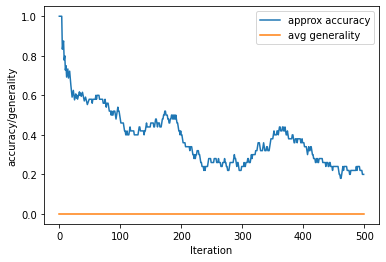

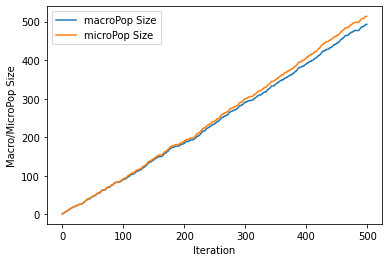

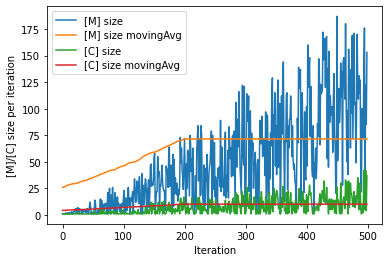

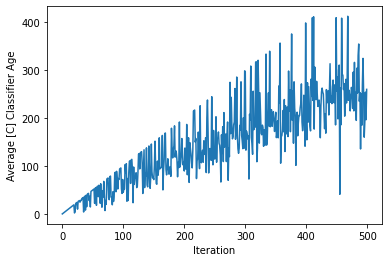

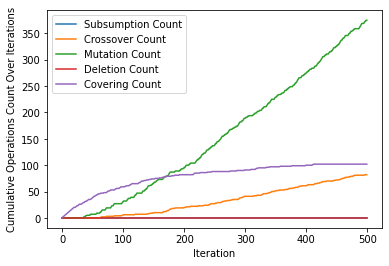

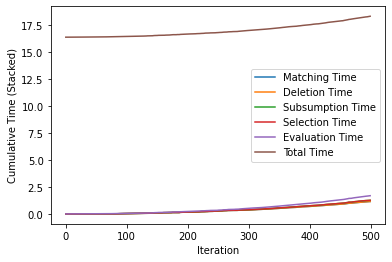

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

def cumulativeFreq(freq):
    a = []
    c = []
    for i in freq:
        a.append(i+sum(c))
        c.append(i)
    return np.array(a)

def movingAvg(a,threshold=300):
    weights = np.repeat(1.0,threshold)/threshold
    conv = np.convolve(a,weights,'valid')
    return np.append(conv,np.full(threshold-1,conv[conv.size-1]),)

dataTracking = pd.read_csv("iterationData_cifar10_Vgg19_50_LCS")

iterations = dataTracking["Iteration"].values
accuracy = dataTracking['Accuracy (approx)'].values
generality = dataTracking['Average Population Generality'].values
macroPop = dataTracking["Macropopulation Size"].values
microPop = dataTracking["Micropopulation Size"].values
mSize = dataTracking["Match Set Size"].values
cSize = dataTracking["Correct Set Size"].values
experience = dataTracking["Average Iteration Age of Correct Set Classifiers"].values
subsumption = dataTracking["# Classifiers Subsumed in Iteration"].values
crossover = dataTracking["# Crossover Operations Performed in Iteration"].values
mutation = dataTracking["# Mutation Operations Performed in Iteration"].values
covering = dataTracking["# Covering Operations Performed in Iteration"].values
deletion = dataTracking["# Deletion Operations Performed in Iteration"].values

gTime = dataTracking["Total Global Time"].values
mTime = dataTracking["Total Matching Time"].values
delTime = dataTracking["Total Deletion Time"].values
subTime = dataTracking["Total Subsumption Time"].values
selTime = dataTracking["Total Selection Time"].values
evalTime = dataTracking["Total Evaluation Time"].values

plt.plot(iterations,accuracy,label="approx accuracy")
plt.plot(iterations,generality,label="avg generality")
plt.xlabel('Iteration')
plt.ylabel('accuracy/generality')
plt.legend()
plt.show()

plt.plot(iterations,macroPop,label="macroPop Size")
plt.plot(iterations,microPop,label="microPop Size")
plt.xlabel('Iteration')
plt.ylabel('Macro/MicroPop Size')
plt.legend()
plt.show()

plt.plot(iterations,mSize,label="[M] size")
plt.plot(iterations,movingAvg(mSize),label="[M] size movingAvg")
plt.plot(iterations,cSize,label="[C] size")
plt.plot(iterations,movingAvg(cSize),label="[C] size movingAvg")
plt.xlabel('Iteration')
plt.ylabel('[M]/[C] size per iteration')
plt.legend()
plt.show()

plt.plot(iterations,experience)
plt.ylabel('Average [C] Classifier Age')
plt.xlabel('Iteration')
plt.show()

plt.plot(iterations,cumulativeFreq(subsumption),label="Subsumption Count")
plt.plot(iterations,cumulativeFreq(crossover),label="Crossover Count")
plt.plot(iterations,cumulativeFreq(mutation),label="Mutation Count")
plt.plot(iterations,cumulativeFreq(deletion),label="Deletion Count")
plt.plot(iterations,cumulativeFreq(covering),label="Covering Count")
plt.xlabel('Iteration')
plt.ylabel('Cumulative Operations Count Over Iterations')
plt.legend()
plt.show()

plt.plot(iterations,mTime,label="Matching Time")
plt.plot(iterations,delTime+mTime,label="Deletion Time")
plt.plot(iterations,subTime+delTime+mTime,label="Subsumption Time")
plt.plot(iterations,selTime+subTime+delTime+mTime,label="Selection Time")
plt.plot(iterations,evalTime+selTime+subTime+delTime+mTime,label="Evaluation Time")
plt.plot(iterations,gTime,label="Total Time")
plt.xlabel('Iteration')
plt.ylabel('Cumulative Time (Stacked)')
plt.legend()
plt.show()

In [11]:
trainedModel.export_final_rule_population(filename="RulePopulationCifar10Vgg1950LCS.csv",DCAL=False)

populationData2 = pd.read_csv("RulePopulationCifar10Vgg1950LCS.csv")
display(populationData2)

,N0,N1,N2,N3,N4,N5,N6,N7,N8,N9,...,Fitness,Accuracy,Numerosity,Avg Match Set Size,TimeStamp GA,Iteration Initialized,Specificity,Deletion Probability,Correct Count,Match Count
0,#,"-5.6079594,3.507629400000001",#,"-8.28083425,5.681438050000001",#,"-10.149642414999999,8.763914815","-4.619698385000001,7.507911785000001",#,"-1.5656472799999994,16.280797279999998","-0.24982980000000055,10.6889178",...,1.048576e-04,0.400000,1,45.000000,272,0,0.56,NaN,2,5
1,"-12.156448155,2.871136155000001","-1.1641560000000006,5.925746400000001","-5.88691935,10.757293950000001",#,"-10.7528577,1.1282945","-4.500734145000001,9.617836745","-5.532291715,6.003727715000001","-9.245694550000001,2.199032150000001",#,"3.762193749999999,12.46347025",...,2.936803e-07,0.222222,1,76.631277,441,1,0.46,NaN,4,18
2,"-5.59402789,11.80633289",#,#,"-5.4523752000000005,6.665823400000001",#,"-4.714925035,5.674212035",#,#,"-3.4366531,13.8340997",#,...,7.606176e-06,0.307692,1,122.117995,464,2,0.50,NaN,28,91
3,#,#,#,#,#,"-9.108219106,9.006173734","-12.86243833,-1.6222142699999997","-8.703788320000001,10.11642892","7.081947540000001,16.86870746",#,...,1.000000e+00,1.000000,1,37.666667,422,3,0.46,NaN,3,3
4,#,#,#,#,"-3.9168909999999997,5.3562034","-5.225502025,6.761963825",#,#,#,#,...,1.152738e-05,0.320755,2,89.756710,472,4,0.50,NaN,17,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,"-3.4178845800000004,10.29149058","-9.3765243,0.7519077000000012",#,"-6.36985104,7.328982160000001","-11.2289766,2.101096600000001",#,#,"-5.682229820000001,2.9648970200000013","-4.51579708,7.573729879999999",#,...,1.932361e-07,0.268293,1,147.871181,495,495,0.48,NaN,0,0
489,#,#,"-4.20295284,9.62454744",#,#,#,#,#,#,#,...,4.611259e-10,0.146318,1,120.416499,496,496,0.34,NaN,0,0
490,"-3.7618027100000004,3.620168530000001",#,#,"-2.6495008442900225,4.19914055",#,"-4.043460495,6.761963825",#,"-11.09941876,7.212143960000001",#,#,...,4.611259e-10,0.146318,1,125.144755,496,496,0.40,NaN,0,0
491,#,"-10.434236400000001,3.9987792000000013","-5.81880421,6.472307149999999",#,#,#,#,"-10.340971410000002,4.155682410000001","2.4439147400000003,10.79144526",#,...,3.625096e-07,0.285714,1,87.968000,498,498,0.58,NaN,0,0


# **Ruleset Dataframe**

In [12]:
#ruleset = pd.read_csv ('RulePopulationCifar10Vgg1950LCScsv')
ruleset = pd.read_csv ('/content/RulePopulationCifar10Vgg1950LCScsv')

ruleset

FileNotFoundError: [Errno 2] No such file or directory: '/content/RulePopulationCifar10Vgg1950LCScsv'

In [ ]:
ruleset2=ruleset.replace("#",np.nan)

In [ ]:
ruleset3=ruleset2.replace(np.nan,0)

In [ ]:
ruleset3

In [ ]:
Extra=['phenotype','Fitness','Accuracy','Numerosity','Avg Match Set Size','TimeStamp GA','Iteration Initialized','Specificity','Deletion Probability','Correct Count','Match Count']

In [ ]:
correct=Extra[9]

In [ ]:
#ruleset1
#Features = ruleset.drop(Extra,axis = 1).columns.values

#ruleset2
#Features = ruleset2.drop(Extra,axis = 1).columns.values

#ruleset3
Features = ruleset3.drop(Extra,axis = 1).columns.values

print(Features)

# **Real curve LCS**

## Class 0

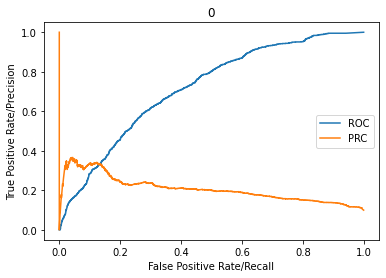

PRC AUC:0.20609350835048765
ROC AUC:0.716884222222222


In [13]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

probs = trainedModel.predict_proba(X_t)
fpr1, tpr1, thresholds1 = roc_curve(Y_test[:,0], probs[:,0])
prec1, recall1, thresholds1 = precision_recall_curve(Y_test[:,0], probs[:,0])

plt.plot(fpr1,tpr1,label="ROC")
plt.plot(recall1,prec1,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('0')
plt.show()

print("PRC AUC:" + str(auc(recall1, prec1)))
print("ROC AUC:" + str(auc(fpr1, tpr1)))

In [14]:
score_true_1=[]

In [15]:
for x in range(0,iteration):
  if probs[x][0]>=0.5:
    score_true_1.append(1)
  else:
    score_true_1.append(0)

score_true_1

[0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,


In [16]:
score_true_correct_index_1_LCS=[]
score_true_wrong_index_1_LCS=[]

In [17]:
for x in range(0,iteration):
  if score_true_1[x]!=Y_test[x,0]:
    score_true_wrong_index_1_LCS.append(x+1)
  else:
    score_true_correct_index_1_LCS.append(x+1)

In [18]:
correct_0=len(score_true_correct_index_1_LCS)
accuracy_1=correct_0/iteration

## Class 1

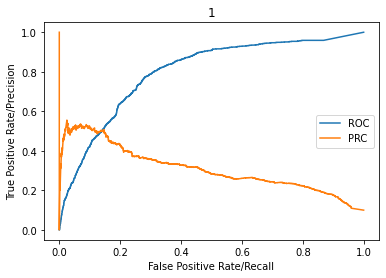

PRC AUC:0.30861052922584614
ROC AUC:0.7968006111111111


In [19]:
fpr2, tpr2, thresholds2 = roc_curve(Y_test[:,1], probs[:, 1])
prec2, recall2, thresholds2 = precision_recall_curve(Y_test[:,1], probs[:, 1])

plt.plot(fpr2,tpr2,label="ROC")
plt.plot(recall2,prec2,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('1')
plt.show()

print("PRC AUC:" + str(auc(recall2, prec2)))
print("ROC AUC:" + str(auc(fpr2, tpr2)))

In [20]:
score_true_2=[]

In [21]:
for x in range(0,iteration):
  if probs[x][1]>=0.5:
    score_true_2.append(1)
  else:
    score_true_2.append(0)

score_true_2

[0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,


In [22]:
score_true_correct_index_2_LCS=[]
score_true_wrong_index_2_LCS=[]

In [23]:
for x in range(0,iteration):
  if score_true_2[x]!=Y_test[x,1]:
    score_true_wrong_index_2_LCS.append(x+1)
  else:
    score_true_correct_index_2_LCS.append(x+1)

In [24]:
correct_1=len(score_true_correct_index_2_LCS)
accuracy_2=correct_1/iteration

## Class 2

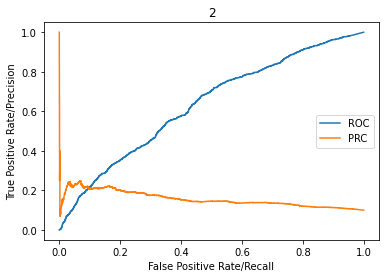

PRC AUC:0.1560280362012548
ROC AUC:0.632422


In [25]:
fpr3, tpr3, thresholds3 = roc_curve(Y_test[:,2], probs[:, 2])
prec3, recall3, thresholds3 = precision_recall_curve(Y_test[:,2], probs[:, 2])

plt.plot(fpr3,tpr3,label="ROC")
plt.plot(recall3,prec3,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('2')
plt.show()

print("PRC AUC:" + str(auc(recall3, prec3)))
print("ROC AUC:" + str(auc(fpr3, tpr3)))

In [26]:
score_true_3=[]

In [27]:
for x in range(0,iteration):
  if probs[x][2]>=0.5:
    score_true_3.append(1)
  else:
    score_true_3.append(0)

score_true_3

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [28]:
score_true_correct_index_3_LCS=[]
score_true_wrong_index_3_LCS=[]

In [29]:
for x in range(0,iteration):
  if score_true_3[x]!=Y_test[x,2]:
    score_true_wrong_index_3_LCS.append(x+1)
  else:
    score_true_correct_index_3_LCS.append(x+1)

In [30]:
correct_2=len(score_true_correct_index_3_LCS)
accuracy_3=correct_2/iteration

## Class 3

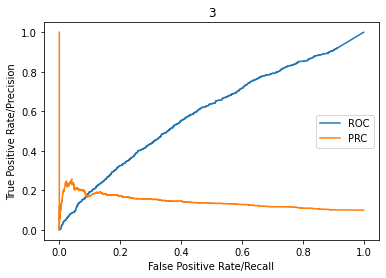

PRC AUC:0.14044230885677592
ROC AUC:0.5924885


In [31]:
fpr4, tpr4, thresholds4 = roc_curve(Y_test[:,3], probs[:, 3])
prec4, recall4, thresholds4 = precision_recall_curve(Y_test[:,3], probs[:, 3])

plt.plot(fpr4,tpr4,label="ROC")
plt.plot(recall4,prec4,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('3')
plt.show()

print("PRC AUC:" + str(auc(recall4, prec4)))
print("ROC AUC:" + str(auc(fpr4, tpr4)))

In [32]:
score_true_4=[]

In [33]:
for x in range(0,iteration):
  if probs[x][3]>=0.5:
    score_true_4.append(1)
  else:
    score_true_4.append(0)

score_true_4

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,


In [34]:
score_true_correct_index_4_LCS=[]
score_true_wrong_index_4_LCS=[]

In [35]:
for x in range(0,iteration):
  if score_true_4[x]!=Y_test[x,3]:
    score_true_wrong_index_4_LCS.append(x+1)
  else:
    score_true_correct_index_4_LCS.append(x+1)

In [36]:
correct_3=len(score_true_correct_index_4_LCS)
accuracy_4=correct_3/iteration

## Class 4

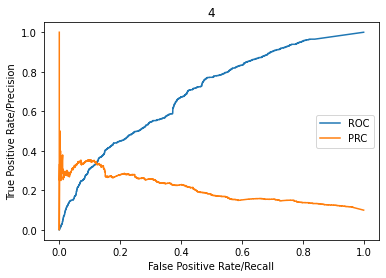

PRC AUC:0.2047214186635628
ROC AUC:0.6923800555555555


In [37]:
fpr5, tpr5, thresholds5 = roc_curve(Y_test[:,4], probs[:, 4])
prec5, recall5, thresholds5 = precision_recall_curve(Y_test[:,4], probs[:, 4])

plt.plot(fpr5,tpr5,label="ROC")
plt.plot(recall5,prec5,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('4')
plt.show()

print("PRC AUC:" + str(auc(recall5, prec5)))
print("ROC AUC:" + str(auc(fpr5, tpr5)))

In [38]:
score_true_5=[]

In [39]:
for x in range(0,iteration):
  if probs[x][4]>=0.5:
    score_true_5.append(1)
  else:
    score_true_5.append(0)

score_true_5

[1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,


In [40]:
score_true_correct_index_5_LCS=[]
score_true_wrong_index_5_LCS=[]

In [41]:
for x in range(0,iteration):
  if score_true_5[x]!=Y_test[x,4]:
    score_true_wrong_index_5_LCS.append(x+1)
  else:
    score_true_correct_index_5_LCS.append(x+1)

In [42]:
correct_4=len(score_true_correct_index_5_LCS)
accuracy_5=correct_4/iteration

## Class 5

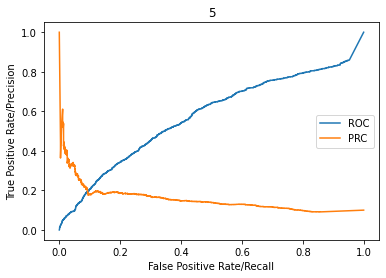

PRC AUC:0.15483040886922333
ROC AUC:0.574915


In [43]:
fpr6, tpr6, thresholds6 = roc_curve(Y_test[:,5], probs[:, 5])
prec6, recall6, thresholds6 = precision_recall_curve(Y_test[:,5], probs[:, 5])

plt.plot(fpr6,tpr6,label="ROC")
plt.plot(recall6,prec6,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('5')
plt.show()

print("PRC AUC:" + str(auc(recall6, prec6)))
print("ROC AUC:" + str(auc(fpr6, tpr6)))

In [44]:
score_true_6=[]

In [45]:
for x in range(0,iteration):
  if probs[x][5]>=0.5:
    score_true_6.append(1)
  else:
    score_true_6.append(0)

score_true_6

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [46]:
score_true_correct_index_6_LCS=[]
score_true_wrong_index_6_LCS=[]

In [47]:
for x in range(0,iteration):
  if score_true_6[x]!=Y_test[x,5]:
    score_true_wrong_index_6_LCS.append(x+1)
  else:
    score_true_correct_index_6_LCS.append(x+1)

In [48]:
correct_5=len(score_true_correct_index_6_LCS)
accuracy_6=correct_5/iteration

## Class 6

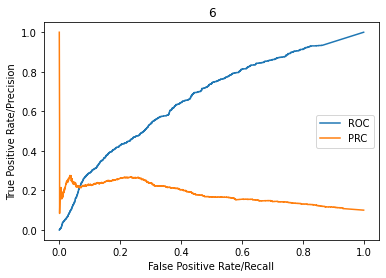

PRC AUC:0.18127022661564762
ROC AUC:0.6677613888888889


In [49]:
fpr7, tpr7, thresholds7 = roc_curve(Y_test[:,6], probs[:, 6])
prec7, recall7, thresholds7 = precision_recall_curve(Y_test[:,6], probs[:, 6])

plt.plot(fpr7,tpr7,label="ROC")
plt.plot(recall7,prec7,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('6')
plt.show()

print("PRC AUC:" + str(auc(recall7, prec7)))
print("ROC AUC:" + str(auc(fpr7, tpr7)))

In [50]:
score_true_7=[]

In [51]:
for x in range(0,iteration):
  if probs[x][6]>=0.5:
    score_true_7.append(1)
  else:
    score_true_7.append(0)

score_true_7

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [52]:
score_true_correct_index_7_LCS=[]
score_true_wrong_index_7_LCS=[]

In [53]:
for x in range(0,iteration):
  if score_true_7[x]!=Y_test[x,6]:
    score_true_wrong_index_7_LCS.append(x+1)
  else:
    score_true_correct_index_7_LCS.append(x+1)

In [54]:
correct_6=len(score_true_correct_index_7_LCS)
accuracy_7=correct_6/iteration

## Class 7

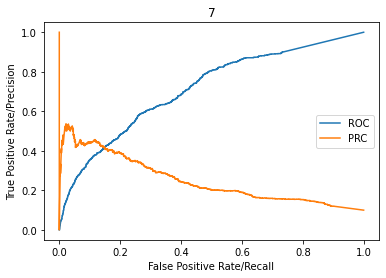

PRC AUC:0.24896417946572807
ROC AUC:0.7123531111111112


In [55]:
fpr8, tpr8, thresholds8 = roc_curve(Y_test[:,7], probs[:, 7])
prec8, recall8, thresholds8 = precision_recall_curve(Y_test[:,7], probs[:, 7])

plt.plot(fpr8,tpr8,label="ROC")
plt.plot(recall8,prec8,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('7')
plt.show()

print("PRC AUC:" + str(auc(recall8, prec8)))
print("ROC AUC:" + str(auc(fpr8, tpr8)))

In [56]:
score_true_8=[]

In [57]:
for x in range(0,iteration):
  if probs[x][7]>=0.5:
    score_true_8.append(1)
  else:
    score_true_8.append(0)

score_true_8

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [58]:
score_true_correct_index_8_LCS=[]
score_true_wrong_index_8_LCS=[]

In [59]:
for x in range(0,iteration):
  if score_true_8[x]!=Y_test[x,7]:
    score_true_wrong_index_8_LCS.append(x+1)
  else:
    score_true_correct_index_8_LCS.append(x+1)

In [60]:
correct_7=len(score_true_correct_index_8_LCS)
accuracy_8=correct_7/iteration

## Class 8

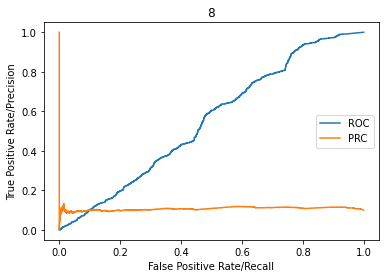

PRC AUC:0.10695115446583724
ROC AUC:0.5513139444444445


In [61]:
fpr9, tpr9, thresholds9 = roc_curve(Y_test[:,8], probs[:, 8])
prec9, recall9, thresholds9 = precision_recall_curve(Y_test[:,8], probs[:, 8])

plt.plot(fpr9,tpr9,label="ROC")
plt.plot(recall9,prec9,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('8')
plt.show()

print("PRC AUC:" + str(auc(recall9, prec9)))
print("ROC AUC:" + str(auc(fpr9, tpr9)))

In [62]:
score_true_9=[]

In [63]:
for x in range(0,iteration):
  if probs[x][8]>=0.5:
    score_true_9.append(1)
  else:
    score_true_9.append(0)

score_true_9

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [64]:
score_true_correct_index_9_LCS=[]
score_true_wrong_index_9_LCS=[]

In [65]:
for x in range(0,iteration):
  if score_true_9[x]!=Y_test[x,8]:
    score_true_wrong_index_9_LCS.append(x+1)
  else:
    score_true_correct_index_9_LCS.append(x+1)

In [66]:
correct_8=len(score_true_correct_index_9_LCS)
accuracy_9=correct_8/iteration

## Class 9

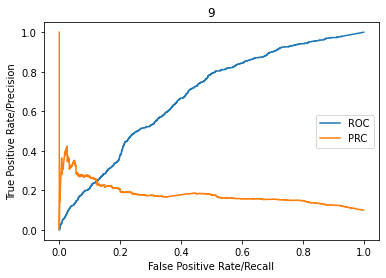

PRC AUC:0.17906178591551158
ROC AUC:0.6779964444444444


In [67]:
fpr10, tpr10, thresholds10 = roc_curve(Y_test[:,9], probs[:, 9])
prec10, recall10, thresholds10 = precision_recall_curve(Y_test[:,9], probs[:, 9])

plt.plot(fpr10,tpr10,label="ROC")
plt.plot(recall10,prec10,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('9')
plt.show()

print("PRC AUC:" + str(auc(recall10, prec10)))
print("ROC AUC:" + str(auc(fpr10, tpr10)))

In [68]:
score_true_10=[]

In [69]:
for x in range(0,iteration):
  if probs[x][9]>=0.5:
    score_true_10.append(1)
  else:
    score_true_10.append(0)

score_true_10

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [70]:
score_true_correct_index_10_LCS=[]
score_true_wrong_index_10_LCS=[]

In [71]:
for x in range(0,iteration):
  if score_true_10[x]!=Y_test[x,9]:
    score_true_wrong_index_10_LCS.append(x+1)
  else:
    score_true_correct_index_10_LCS.append(x+1)

In [72]:
correct_9=len(score_true_correct_index_10_LCS)
accuracy_10=correct_9/iteration

#**Black box instances**

In [73]:
correct='correct'
incorrect='incorrect'

##Class 0

In [74]:
correct_NN_1= pd.read_csv("Vgg_19_cifar10_50_Neural_Network_class_0_correct.csv")
incorrect_NN_1=pd.read_csv("Vgg_19_cifar10_50_Neural_Network_class_0_incorrect.csv")


#correct_NN_1= pd.read_csv("/content/Vgg_19_cifar10_50_Neural_Network_class_0_correct.csv")
#incorrect_NN_1=pd.read_csv("/content/Vgg_19_cifar10_50_Neural_Network_class_0_incorrect.csv")

correct_nn_1=correct_NN_1[correct].values
incorrect_nn_1=incorrect_NN_1[incorrect].values

In [75]:
correct_1n=len(correct_nn_1)
accuracy_1n=correct_1n/iteration

##Class 1

In [76]:
correct_NN_2= pd.read_csv("Vgg_19_cifar10_50_Neural_Network_class_1_correct.csv")
incorrect_NN_2=pd.read_csv("Vgg_19_cifar10_50_Neural_Network_class_1_incorrect.csv")

#correct_NN_2= pd.read_csv("/content/Vgg_19_cifar10_50_Neural_Network_class_1_correct.csv")
#incorrect_NN_2=pd.read_csv("/content/Vgg_19_cifar10_50_Neural_Network_class_1_incorrect.csv")

correct_nn_2=correct_NN_2[correct].values
incorrect_nn_2=incorrect_NN_2[incorrect].values

In [77]:
correct_2n=len(correct_nn_2)
accuracy_2n=correct_2n/iteration

##Class 2

In [78]:
correct_NN_3= pd.read_csv("Vgg_19_cifar10_50_Neural_Network_class_2_correct.csv")
incorrect_NN_3=pd.read_csv("Vgg_19_cifar10_50_Neural_Network_class_2_incorrect.csv")

#correct_NN_3= pd.read_csv("/content/Vgg_19_cifar10_50_Neural_Network_class_2_correct.csv")
#incorrect_NN_3=pd.read_csv("/content/Vgg_19_cifar10_50_Neural_Network_class_2_incorrect.csv")

correct_nn_3=correct_NN_3[correct].values
incorrect_nn_3=incorrect_NN_3[incorrect].values

In [79]:
correct_3n=len(correct_nn_3)
accuracy_3n=correct_3n/iteration

##Class 3

In [80]:
correct_NN_4= pd.read_csv("Vgg_19_cifar10_50_Neural_Network_class_3_correct.csv")
incorrect_NN_4=pd.read_csv("Vgg_19_cifar10_50_Neural_Network_class_3_incorrect.csv")

#correct_NN_4= pd.read_csv("/content/Vgg_19_cifar10_50_Neural_Network_class_3_correct.csv")
#incorrect_NN_4=pd.read_csv("/content/Vgg_19_cifar10_50_Neural_Network_class_3_incorrect.csv")

correct_nn_4=correct_NN_4[correct].values
incorrect_nn_4=incorrect_NN_4[incorrect].values

In [81]:
correct_4n=len(correct_nn_4)
accuracy_4n=correct_4n/iteration

##Class 4

In [82]:
correct_NN_5= pd.read_csv("Vgg_19_cifar10_50_Neural_Network_class_4_correct.csv")
incorrect_NN_5=pd.read_csv("Vgg_19_cifar10_50_Neural_Network_class_4_incorrect.csv")

#correct_NN_5= pd.read_csv("/content/Vgg_19_cifar10_50_Neural_Network_class_4_correct.csv")
#incorrect_NN_5=pd.read_csv("/content/Vgg_19_cifar10_50_Neural_Network_class_4_incorrect.csv")

correct_nn_5=correct_NN_5[correct].values
incorrect_nn_5=incorrect_NN_5[incorrect].values

In [83]:
correct_5n=len(correct_nn_5)
accuracy_5n=correct_5n/iteration

##Class 5

In [84]:
correct_NN_6= pd.read_csv("Vgg_19_cifar10_50_Neural_Network_class_5_correct.csv")
incorrect_NN_6=pd.read_csv("Vgg_19_cifar10_50_Neural_Network_class_5_incorrect.csv")

#correct_NN_6= pd.read_csv("/content/Vgg_19_cifar10_50_Neural_Network_class_5_correct.csv")
#incorrect_NN_6=pd.read_csv("/content/Vgg_19_cifar10_50_Neural_Network_class_5_incorrect.csv")

correct_nn_6=correct_NN_6[correct].values
incorrect_nn_6=incorrect_NN_6[incorrect].values

In [85]:
correct_6n=len(correct_nn_6)
accuracy_6n=correct_6n/iteration

##Class 6

In [86]:
correct_NN_7= pd.read_csv("Vgg_19_cifar10_50_Neural_Network_class_6_correct.csv")
incorrect_NN_7=pd.read_csv("Vgg_19_cifar10_50_Neural_Network_class_6_incorrect.csv")

#correct_NN_7= pd.read_csv("/content/Vgg_19_cifar10_50_Neural_Network_class_6_correct.csv")
#incorrect_NN_7=pd.read_csv("/content/Vgg_19_cifar10_50_Neural_Network_class_6_incorrect.csv")

correct_nn_7=correct_NN_7[correct].values
incorrect_nn_7=incorrect_NN_7[incorrect].values

In [87]:
correct_7n=len(correct_nn_7)
accuracy_7n=correct_7n/iteration

##Class 7

In [88]:
correct_NN_8= pd.read_csv("Vgg_19_cifar10_50_Neural_Network_class_7_correct.csv")
incorrect_NN_8=pd.read_csv("Vgg_19_cifar10_50_Neural_Network_class_7_incorrect.csv")

#correct_NN_8= pd.read_csv("/content/Vgg_19_cifar10_50_Neural_Network_class_7_correct.csv")
#incorrect_NN_8=pd.read_csv("/content/Vgg_19_cifar10_50_Neural_Network_class_7_incorrect.csv")

correct_nn_8=correct_NN_8[correct].values
incorrect_nn_8=incorrect_NN_8[incorrect].values

In [89]:
correct_8n=len(correct_nn_8)
accuracy_8n=correct_8n/iteration

##Class 8

In [90]:
correct_NN_9= pd.read_csv("Vgg_19_cifar10_50_Neural_Network_class_8_correct.csv")
incorrect_NN_9=pd.read_csv("Vgg_19_cifar10_50_Neural_Network_class_8_incorrect.csv")

#correct_NN_9= pd.read_csv("/content/Vgg_19_cifar10_50_Neural_Network_class_8_correct.csv")
#incorrect_NN_9=pd.read_csv("/content/Vgg_19_cifar10_50_Neural_Network_class_8_incorrect.csv")

correct_nn_9=correct_NN_9[correct].values
incorrect_nn_9=incorrect_NN_9[incorrect].values

In [91]:
correct_9n=len(correct_nn_9)
accuracy_9n=correct_9n/iteration

##Class 9

In [92]:
correct_NN_10= pd.read_csv("Vgg_19_cifar10_50_Neural_Network_class_9_correct.csv")
incorrect_NN_10=pd.read_csv("Vgg_19_cifar10_50_Neural_Network_class_9_incorrect.csv")

#correct_NN_10= pd.read_csv("/content/Vgg_19_cifar10_50_Neural_Network_class_9_correct.csv")
#incorrect_NN_10=pd.read_csv("/content/Vgg_19_cifar10_50_Neural_Network_class_9_incorrect.csv")

correct_nn_10=correct_NN_10[correct].values
incorrect_nn_10=incorrect_NN_10[incorrect].values

In [93]:
correct_10n=len(correct_nn_10)
accuracy_10n=correct_10n/iteration

#**Shared labels**

##Class 0

In [94]:
correct_shared_1=list(set(score_true_correct_index_1_LCS)&set(correct_nn_1))
incorrect_shared_1=list(set(score_true_wrong_index_1_LCS)&set(incorrect_nn_1))

In [95]:
class0_correct_shared=pd.DataFrame(correct_shared_1,columns=['correct'])
class0_wrong_shared=pd.DataFrame(incorrect_shared_1,columns=['incorrect'])

class0_correct_shared.to_csv('Vgg19_cifar10_50_shared_class_0_correct.csv',index=False)
class0_wrong_shared.to_csv('Vgg19_cifar10_50_shared_class_0_incorrect.csv',index=False)

##Class 1

In [96]:
correct_shared_2=list(set(score_true_correct_index_2_LCS)&set(correct_nn_2))
incorrect_shared_2=list(set(score_true_wrong_index_2_LCS)&set(incorrect_nn_2))

In [97]:
class1_correct_shared=pd.DataFrame(correct_shared_2,columns=['correct'])
class1_wrong_shared=pd.DataFrame(incorrect_shared_2,columns=['incorrect'])

class1_correct_shared.to_csv('Vgg19_cifar10_50_shared_class_1_correct.csv',index=False)
class1_wrong_shared.to_csv('Vgg19_cifar10_50_shared_class_1_incorrect.csv',index=False)

##Class 2

In [98]:
correct_shared_3=list(set(score_true_correct_index_3_LCS)&set(correct_nn_3))
incorrect_shared_3=list(set(score_true_wrong_index_3_LCS)&set(incorrect_nn_3))

In [99]:
class2_correct_shared=pd.DataFrame(correct_shared_3,columns=['correct'])
class2_wrong_shared=pd.DataFrame(incorrect_shared_3,columns=['incorrect'])

class2_correct_shared.to_csv('Vgg19_cifar10_50_shared_class_2_correct.csv',index=False)
class2_wrong_shared.to_csv('Vgg19_cifar10_50_shared_class_2_incorrect.csv',index=False)

##Class 3

In [100]:
correct_shared_4=list(set(score_true_correct_index_4_LCS)&set(correct_nn_4))
incorrect_shared_4=list(set(score_true_wrong_index_4_LCS)&set(incorrect_nn_4))

In [101]:
class3_correct_shared=pd.DataFrame(correct_shared_4,columns=['correct'])
class3_wrong_shared=pd.DataFrame(incorrect_shared_4,columns=['incorrect'])

class3_correct_shared.to_csv('Vgg19_cifar10_50_shared_class_3_correct.csv',index=False)
class3_wrong_shared.to_csv('Vgg19_cifar10_50_shared_class_3_incorrect.csv',index=False)

##Class 4

In [102]:
correct_shared_5=list(set(score_true_correct_index_5_LCS)&set(correct_nn_5))
incorrect_shared_5=list(set(score_true_wrong_index_5_LCS)&set(incorrect_nn_5))

In [103]:
class4_correct_shared=pd.DataFrame(correct_shared_5,columns=['correct'])
class4_wrong_shared=pd.DataFrame(incorrect_shared_5,columns=['incorrect'])

class4_correct_shared.to_csv('Vgg19_cifar10_50_shared_class_4_correct.csv',index=False)
class4_wrong_shared.to_csv('Vgg19_cifar10_50_shared_class_4_incorrect.csv',index=False)

##Class 5

In [104]:
correct_shared_6=list(set(score_true_correct_index_6_LCS)&set(correct_nn_6))
incorrect_shared_6=list(set(score_true_wrong_index_6_LCS)&set(incorrect_nn_6))

In [105]:
class5_correct_shared=pd.DataFrame(correct_shared_6,columns=['correct'])
class5_wrong_shared=pd.DataFrame(incorrect_shared_6,columns=['incorrect'])

class5_correct_shared.to_csv('Vgg19_cifar10_50_shared_class_5_correct.csv',index=False)
class5_wrong_shared.to_csv('Vgg19_cifar10_50_shared_class_5_incorrect.csv',index=False)

##Class 6

In [106]:
correct_shared_7=list(set(score_true_correct_index_7_LCS)&set(correct_nn_7))
incorrect_shared_7=list(set(score_true_wrong_index_7_LCS)&set(incorrect_nn_7))

In [107]:
class6_correct_shared=pd.DataFrame(correct_shared_7,columns=['correct'])
class6_wrong_shared=pd.DataFrame(incorrect_shared_7,columns=['incorrect'])

class6_correct_shared.to_csv('Vgg19_cifar10_50_shared_class_6_correct.csv',index=False)
class6_wrong_shared.to_csv('Vgg19_cifar10_50_shared_class_6_incorrect.csv',index=False)

##Class 7

In [108]:
correct_shared_8=list(set(score_true_correct_index_8_LCS)&set(correct_nn_8))
incorrect_shared_8=list(set(score_true_wrong_index_8_LCS)&set(incorrect_nn_8))

In [109]:
class7_correct_shared=pd.DataFrame(correct_shared_8,columns=['correct'])
class7_wrong_shared=pd.DataFrame(incorrect_shared_8,columns=['incorrect'])

class7_correct_shared.to_csv('Vgg19_cifar10_50_shared_class_7_correct.csv',index=False)
class7_wrong_shared.to_csv('Vgg19_cifar10_50_shared_class_7_incorrect.csv',index=False)

##Class 8

In [110]:
correct_shared_9=list(set(score_true_correct_index_9_LCS)&set(correct_nn_9))
incorrect_shared_9=list(set(score_true_wrong_index_9_LCS)&set(incorrect_nn_9))

In [111]:
class8_correct_shared=pd.DataFrame(correct_shared_9,columns=['correct'])
class8_wrong_shared=pd.DataFrame(incorrect_shared_9,columns=['incorrect'])

class8_correct_shared.to_csv('Vgg19_cifar10_50_shared_class_8_correct.csv',index=False)
class8_wrong_shared.to_csv('Vgg19_cifar10_50_shared_class_8_incorrect.csv',index=False)

##Class 9

In [112]:
correct_shared_10=list(set(score_true_correct_index_10_LCS)&set(correct_nn_10))
incorrect_shared_10=list(set(score_true_wrong_index_10_LCS)&set(incorrect_nn_10))

In [113]:
class9_correct_shared=pd.DataFrame(correct_shared_10,columns=['correct'])
class9_wrong_shared=pd.DataFrame(incorrect_shared_10,columns=['incorrect'])

class9_correct_shared.to_csv('Vgg19_cifar10_50_shared_class_9_correct.csv',index=False)
class9_wrong_shared.to_csv('Vgg19_cifar10_50_shared_class_9_incorrect.csv',index=False)

#**Average scores**

In [114]:
average_accuracy_LCS=(accuracy_1+accuracy_2+accuracy_3+accuracy_4+accuracy_5+accuracy_6+accuracy_7+accuracy_8+accuracy_9+accuracy_10)/10
average_accuracy_LCS

0.8517800000000001

In [115]:
average_accuracy=(accuracy_1n+accuracy_2n+accuracy_3n+accuracy_4n+accuracy_5n+accuracy_6n+accuracy_7n+accuracy_8n+accuracy_9n+accuracy_10n)/10
average_accuracy

0.9436500000000001